In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization, LayerNormalization

In [4]:
Batch_size = 10
Epochs = 10

In [5]:
# Load the data using Keras Image genarator 
img_gen = ImageDataGenerator(rescale=1./255) # assign a image generator

training_set = img_gen.flow_from_directory(directory=r'C:\Users\ADMIN\OneDrive\Máy tính\AI\Dataset\training_set\training_set', 
                                           target_size=(224,224), 
                                           classes=['cats', 'dogs'], 
                                           batch_size=Batch_size)
                                    

Found 8005 images belonging to 2 classes.


In [6]:
test_set = img_gen.flow_from_directory(directory= r'C:\Users\ADMIN\OneDrive\Máy tính\AI\Dataset\test_set\test_set', 
                                       target_size=(224,224), 
                                       classes=['cats', 'dogs'], 
                                       batch_size=Batch_size, 
                                       shuffle=False)

Found 2023 images belonging to 2 classes.


In [7]:
imgs, labels = next(training_set)
# note size of batch is determine when we create a train set

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

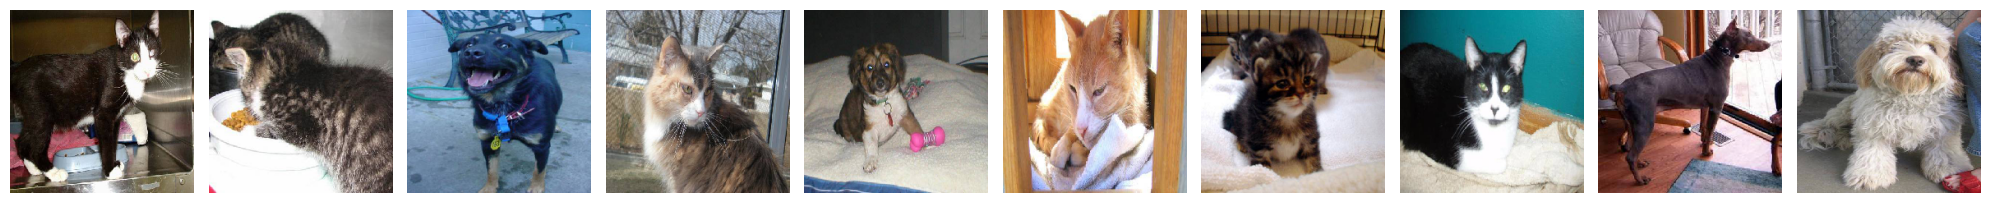

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)
# So here 1. 0. represent cat and 0. 1. represent Dog 
# So here already one hot encoding is done 

In [37]:
model = Sequential()
# 1st Convolution and Pooling layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2),)
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.2))
# 2nd Convolution and Pooling layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2),)
model.add(LayerNormalization(axis=1))
model.add(Dropout(0.2))
# Flatten the layers so that we pass this to dense layers
model.add(Flatten())
model.add(Dropout(0.2))
# output layers
model.add(Dense(units=2, activation='softmax'))

In [38]:
# 1st we have to compile the model 
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 32)     448       
 hNormalization)                                                 
                                                                 
 dropout_18 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 64)      

In [40]:
# Add early stopping if overfitting happen then apply 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
# now fit the model 
model.fit(x=training_set, 
          epochs=Epochs,
          validation_data=test_set, 
          callbacks=[early_stop])

Epoch 1/10
801/801 [==============================] - 531s 661ms/step - loss: 4.1568 - accuracy: 0.5199 - val_loss: 4.4380 - val_accuracy: 0.5294
Epoch 2/10
801/801 [==============================] - 540s 674ms/step - loss: 3.5794 - accuracy: 0.5500 - val_loss: 2.7788 - val_accuracy: 0.5482
Epoch 3/10
801/801 [==============================] - 552s 690ms/step - loss: 2.0247 - accuracy: 0.5711 - val_loss: 1.1647 - val_accuracy: 0.6095
Epoch 4/10
801/801 [==============================] - 431s 538ms/step - loss: 1.1397 - accuracy: 0.6022 - val_loss: 1.0116 - val_accuracy: 0.6001
Epoch 5/10
801/801 [==============================] - 397s 495ms/step - loss: 0.8165 - accuracy: 0.6366 - val_loss: 0.8042 - val_accuracy: 0.6298
Epoch 6/10
801/801 [==============================] - 394s 492ms/step - loss: 0.6442 - accuracy: 0.6715 - val_loss: 0.6274 - val_accuracy: 0.6584
Epoch 7/10
801/801 [==============================] - 384s 479ms/step - loss: 0.5590 - accuracy: 0.7137 - val_loss: 0.7070 -

In [42]:
losses = pd.DataFrame(model.history.history) # Using the early stoping 

<AxesSubplot:>

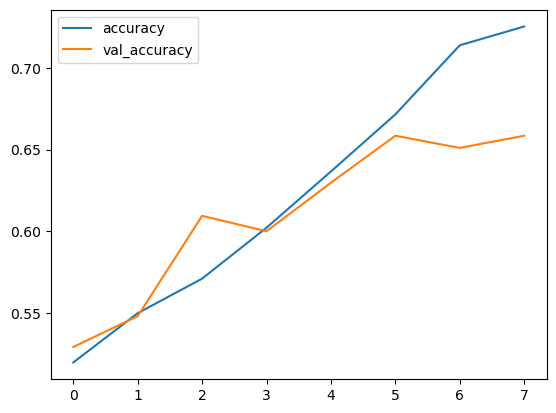

In [43]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

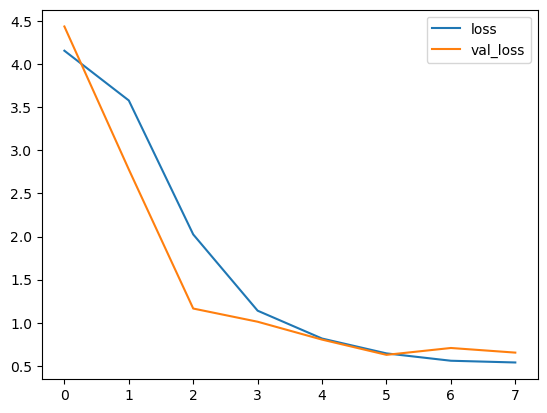

In [44]:
losses[['loss','val_loss']].plot()

In [45]:
#Save my model
model.save('dogs_vs_cats.h5')

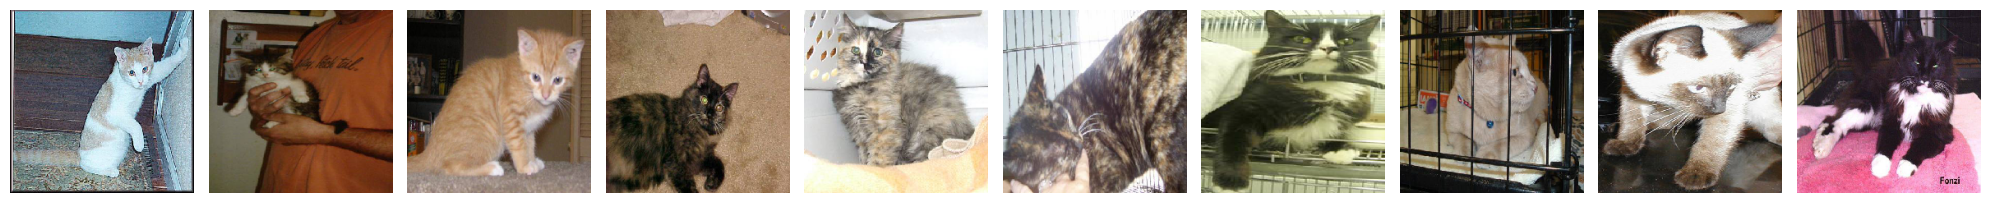

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [46]:
test_img, test_label = next(test_set)

plotImages(test_img)
print(test_label)

In [47]:
img_pred = model.predict(test_img)

1/1 [==============================] - 0s 283ms/step


In [48]:
np.round(img_pred) # image predict by the model 

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

1/1 [==============================] - 0s 23ms/step
dog




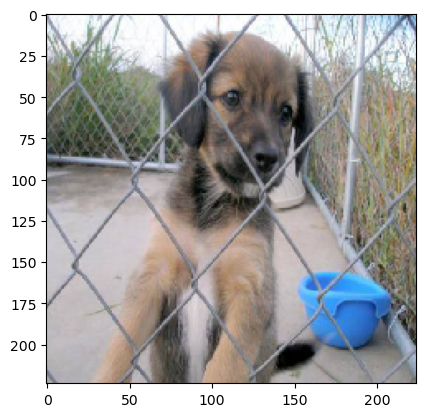

In [51]:
data1 = r'C:\Users\ADMIN\OneDrive\Máy tính\AI\Dataset\test_set\test_set\cats\cat.4137.jpg' # For cat images
data2 = r'C:\Users\ADMIN\OneDrive\Máy tính\AI\Dataset\test_set\test_set\dogs\dog.4042.jpg' # For Dog images

from keras.utils import load_img, img_to_array
test_image1 = load_img(data2, target_size = (224, 224))

test_image = load_img(data2, target_size = (224, 224)) 

test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'cat'
else:
  prediction = 'dog'

print(prediction)
print('\n')
plt.imshow(test_image1)